#### DTSA 5510 Unsupervised Algorithms in Machine Learning
#### Final Project

University of Colorado Boulder Master of Science in Data Science<br>
Sessions 2024 Fall 2 (Oct – Dec)

## Glass Identification

UC Irvine Machine Learning Repository <br>
https://archive.ics.uci.edu/dataset/42/glass+identification

The study of classification of types of glass was motivated by criminological investigation.<br>
At the scene of the crime, the glass left can be used as evidence, if it is correctly identified.

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

## Data overview
-- Sources: <br>
    (a) Creator: B. German
        -- Central Research Establishment
           Home Office Forensic Science Service
           Aldermaston, Reading, Berkshire RG7 4PN <br>
    (b) Donor: Vina Spiehler, Ph.D., DABFT
               Diagnostic Products Corporation
               (213) 776-0180 (ext 3014) <br>
    (c) Date: September, 1987
-- Number of Instances: 214 <br>
-- Number of Attributes: 10 (including an Id#) plus the class attribute <br>
&emsp;   -- all attributes are continuously valued

-- Attribute Information: <br>
&nbsp;   1  - Id number: 1 to  <br>
&nbsp;   2  - RI: refractive index <br>
&nbsp;   3  - Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10) <br>
&nbsp;   4 - Mg: Magnesium <br>
&nbsp;   5 - Al: Aluminum <br>
&nbsp;   6 - Si: Silicon <br>
&nbsp;   7 - K: Potassium <br>
&nbsp;   8 - Ca: Calcium <br>
&nbsp;   9 - Ba: Barium <br>
  10 - Fe: Iron <br>
  11 - Type of glass: (class attribute) <br>
&emsp;      -- 1 building_windows_float_processed <br>
&emsp;      -- 2 building_windows_non_float_processed <br>
&emsp;      -- 3 vehicle_windows_float_processed <br>
&emsp;      -- 4 vehicle_windows_non_float_processed (none in this database) <br>
&emsp;      -- 5 containers <br>
&emsp;      -- 6 tableware <br>
&emsp;      -- 7 headlamps <br>

-- Missing Attribute Values: None

First, I read the database and give colucolum name.

In [8]:
glass = pd.read_csv("glass+identification/glass.data", header=None)
glass.columns = ["Id_number", "refractive_index", "Sodium", "Magnesium", "Aluminum", "Silicon",
                 "Potassium", "Calcium", "Barium", "Iron", "Type_of_glass"]
glass

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Type of glass number change to the name of glass.

In [10]:
for i in range(len(glass)):
    if glass.loc[i, "Type_of_glass"] == 1:
        glass.loc[i, "Type_of_glass"] = "bldg_float"
    if glass.loc[i, "Type_of_glass"] == 2:
        glass.loc[i, "Type_of_glass"] = "bldg_non_float"
    if glass.loc[i, "Type_of_glass"] == 3:
        glass.loc[i, "Type_of_glass"] = "vehicle_float"
    if glass.loc[i, "Type_of_glass"] == 5:
        glass.loc[i, "Type_of_glass"] = "containers"
    if glass.loc[i, "Type_of_glass"] == 6:
        glass.loc[i, "Type_of_glass"] = "tableware"
    if glass.loc[i, "Type_of_glass"] == 7:
        glass.loc[i, "Type_of_glass"] = "headlamps"
glass

C:\Users\kitai\AppData\Local\Temp\ipykernel_22908\3404032656.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'bldg_float' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  glass.loc[i, "Type_of_glass"] = "bldg_float"


,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,bldg_float
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,bldg_float
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,bldg_float
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,bldg_float
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,bldg_float
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


In [11]:
glass.isnull( ).sum( )

Id_number           0
refractive_index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type_of_glass       0
dtype: int64

I found there is no null data. T do not have to delete any data.<br>
I make histgram of count of type of glass.

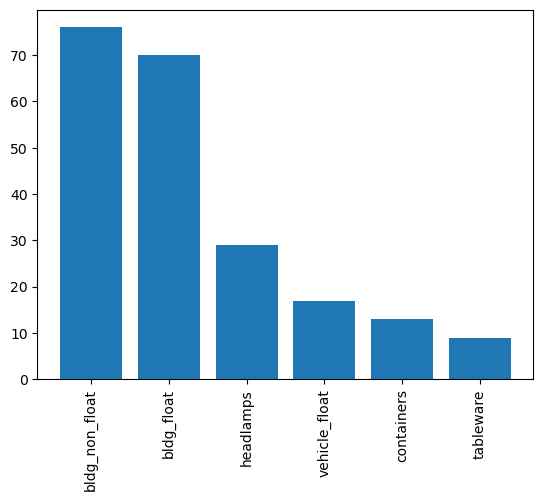

In [13]:
glass["Type_of_glass"].value_counts()
type_count = glass["Type_of_glass"].value_counts()
plt.xticks(rotation=90)
plt.bar(type_count.index, type_count)
plt.savefig("Type_of_glass.jpeg") 

I make histgram of the value of refractive index and the amount of each element.

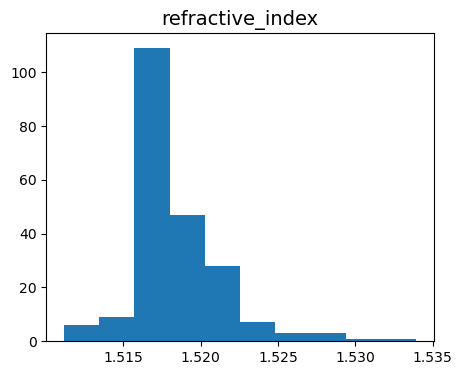

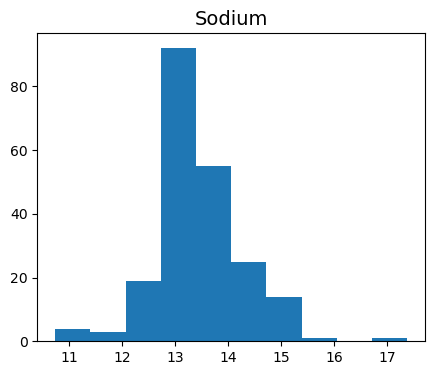

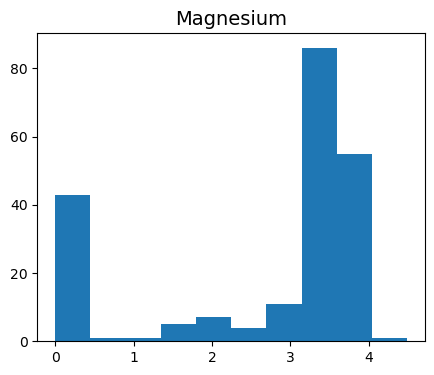

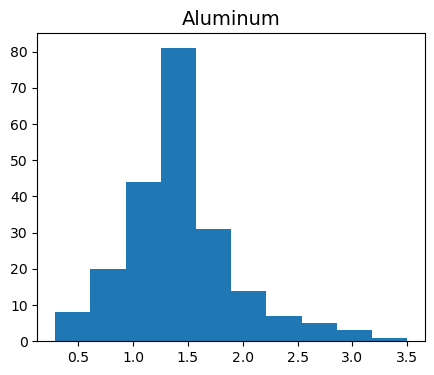

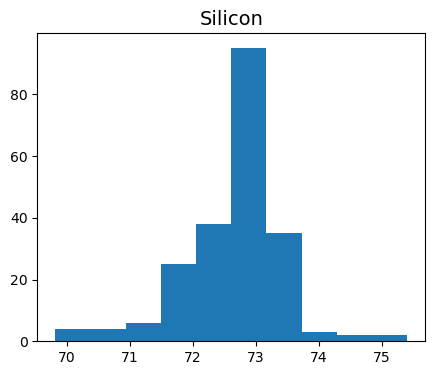

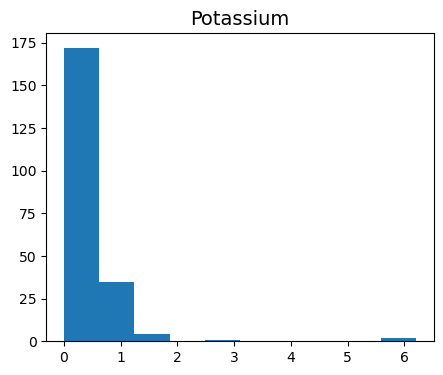

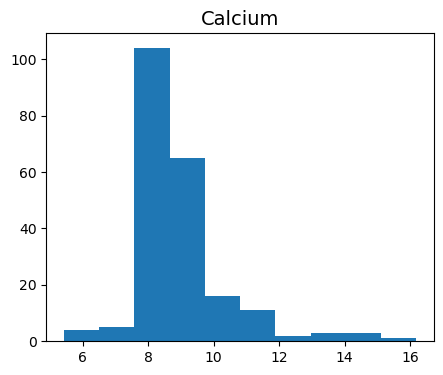

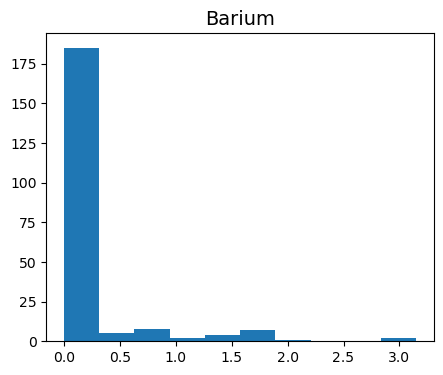

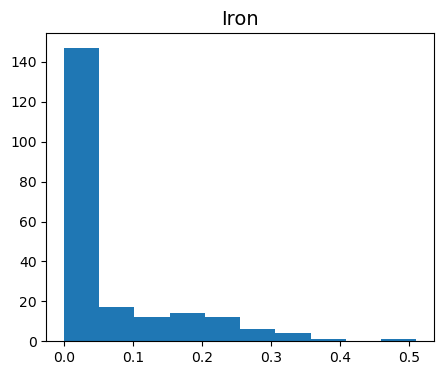

In [15]:
col =  ["refractive_index", "Sodium", "Magnesium", "Aluminum", "Silicon",
                 "Potassium", "Calcium", "Barium", "Iron"]
glass
for attribute in col:
    plt.figure(figsize=(5, 4))
    plt.hist(glass[attribute])
    plt.title(attribute, fontsize=14)
    figname = "hist_" + attribute + ".jpeg"
    plt.savefig(figname)

Most of data distribute like a normal distribution.<br>
However, I found “Potassium” has extreme value data. I suppose data “Potassium” > 4 are regarded as outlier, and I delete them.

In [17]:
print("Number of Outlier : ", sum(glass["Potassium"] > 4))
glass = glass[glass["Potassium"] < 4]
glass

Number of Outlier :  2


,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,bldg_float
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,bldg_float
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,bldg_float
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,bldg_float
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,bldg_float
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


In [18]:
data_glass = glass.drop(["Id_number", "Type_of_glass"], axis=1)
data_glass

,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


Next I make Heat Map of the Data.

,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
refractive_index,1.000000,-0.202803,-0.157112,-0.379594,-0.614356,-0.287785,0.806311,-0.006167,0.135651
Sodium,-0.202803,1.000000,-0.287402,0.180484,-0.085085,-0.432548,-0.285003,0.325535,-0.244721
Magnesium,-0.157112,-0.287402,1.000000,-0.455253,-0.224120,0.311375,-0.481157,-0.507160,0.074083
Aluminum,-0.379594,0.180484,-0.455253,1.000000,0.081191,0.125571,-0.230421,0.515531,-0.059818
Silicon,-0.614356,-0.085085,-0.224120,0.081191,1.000000,0.054697,-0.255466,-0.115033,-0.113002
Potassium,-0.287785,-0.432548,0.311375,0.125571,0.054697,1.000000,-0.387540,-0.025653,0.078364
Calcium,0.806311,-0.285003,-0.481157,-0.230421,-0.255466,-0.387540,1.000000,-0.118758,0.118446
Barium,-0.006167,0.325535,-0.507160,0.515531,-0.115033,-0.025653,-0.118758,1.000000,-0.060778
Iron,0.135651,-0.244721,0.074083,-0.059818,-0.113002,0.078364,0.118446,-0.060778,1.000000


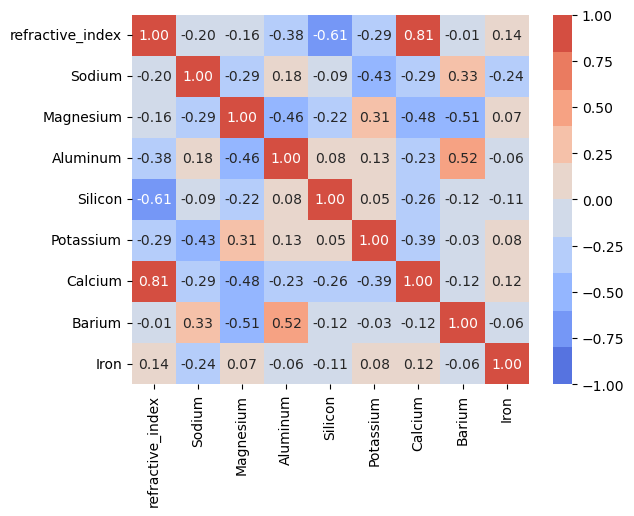

In [20]:
sns.heatmap(data_glass.corr(numeric_only=True), cmap= sns.color_palette('coolwarm', 10),
            annot=True, vmax=1, vmin=-1, center=0, fmt='.2f')   
plt.savefig("heatmap.jpeg") 
data_glass.corr()

Next I make pair plot of the Data

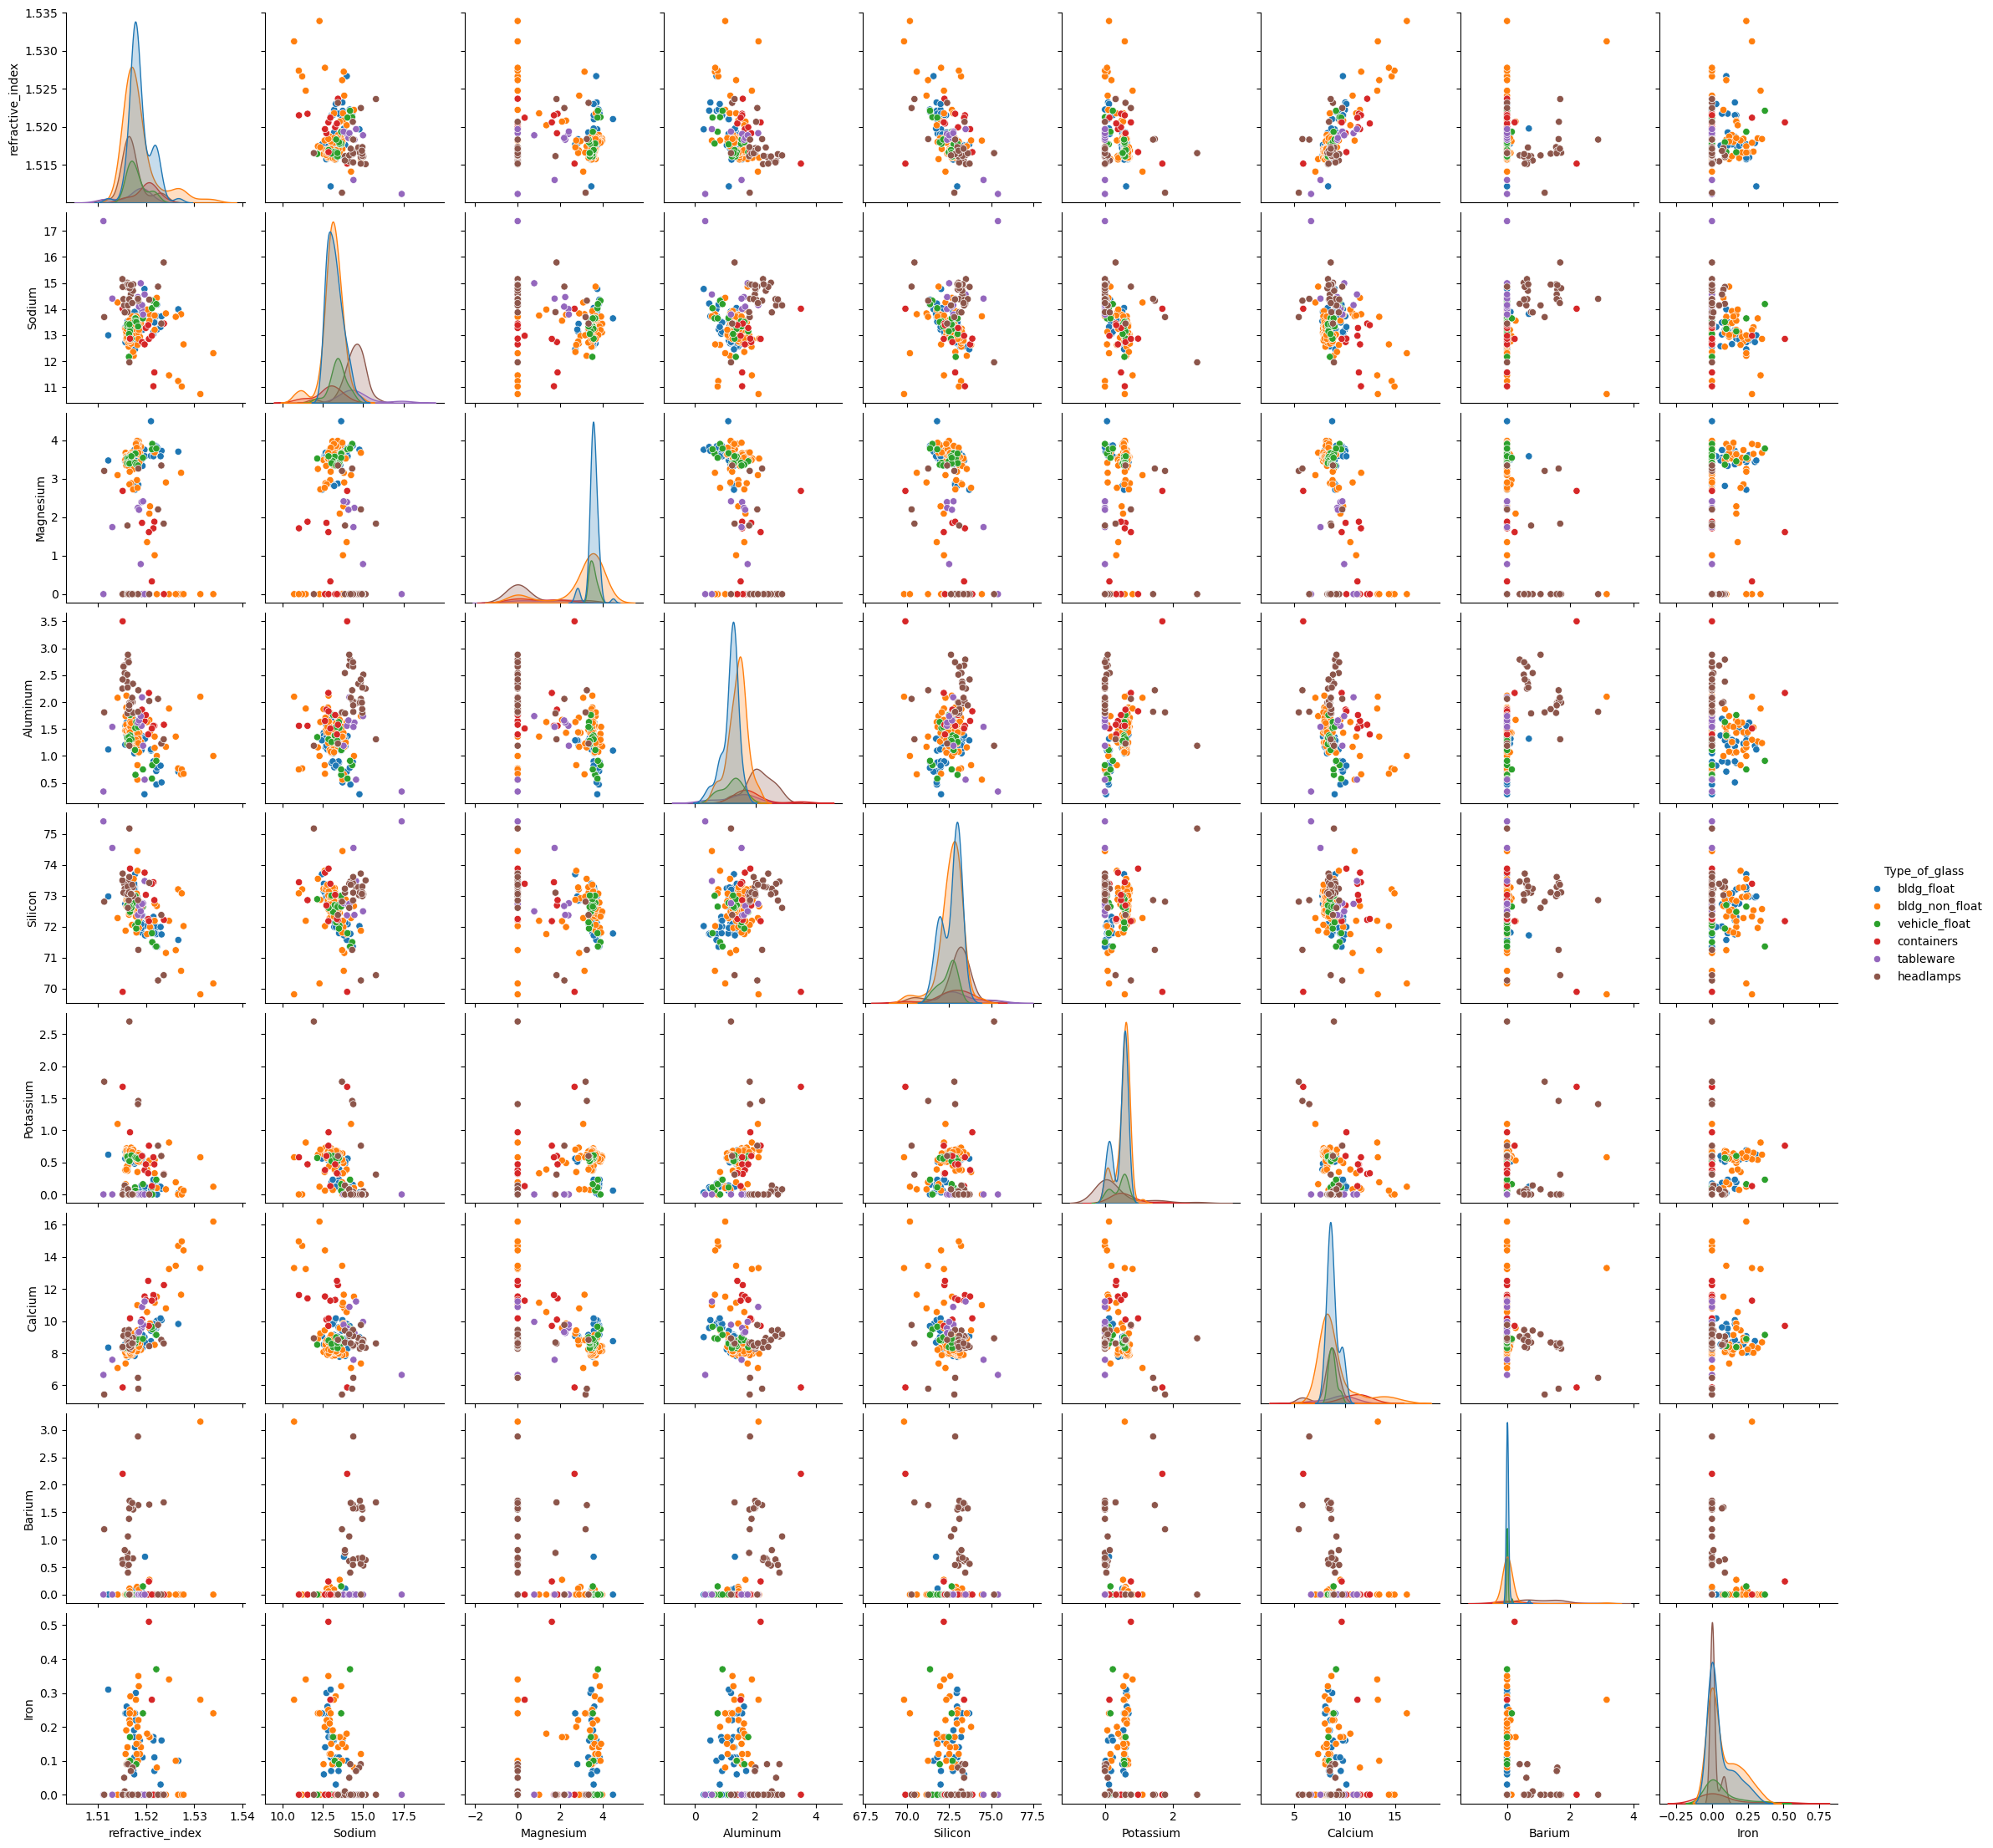

In [22]:
glass_pp = glass.drop(columns = ["Id_number"])
sns.pairplot(glass_pp, hue="Type_of_glass")

Split the data to training data and test data.

In [24]:
train_data, test_data = train_test_split(glass, test_size=0.2, random_state=1)
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
print('train_data : ', len(train_data))
print('test_data  : ', len(test_data))
train_expl_data = train_data.drop(["Id_number", "Type_of_glass"], axis=1)

train_data :  169
test_data  :  43


Excute analysis k-means method.

In [26]:
model_kmeans = KMeans(init='k-means++', n_init = 'auto', n_clusters = 6, random_state = 10)
model_kmeans.fit(np.array(train_expl_data))
labels_predict = model_kmeans.labels_
labels_predict

C:\Users\kitai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 5, 0, 5, 3, 5, 5, 5, 2, 5, 2, 3, 5, 1, 0, 5, 5, 5, 3, 5, 3, 5,
       4, 5, 1, 5, 5, 2, 5, 5, 5, 3, 5, 1, 5, 3, 2, 3, 2, 5, 5, 3, 1, 5,
       3, 5, 5, 1, 5, 5, 1, 2, 2, 5, 5, 1, 5, 1, 5, 5, 1, 3, 5, 3, 3, 3,
       1, 3, 5, 5, 1, 5, 0, 5, 3, 5, 0, 5, 0, 5, 5, 5, 2, 5, 5, 1, 2, 5,
       5, 3, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 1, 3, 3, 5,
       2, 1, 3, 5, 5, 3, 1, 5, 5, 5, 5, 3, 5, 5, 1, 3, 5, 2, 1, 5, 5, 5,
       3, 5, 5, 3, 5, 5, 5, 3, 3, 5, 1, 5, 5, 5, 3, 3, 5, 3, 5, 5, 5, 5,
       5, 1, 5, 5, 5, 3, 5, 1, 5, 5, 1, 5, 5, 5, 5])

I identify the resuut of k-means method labels to the type of glass. And make coffusion matrix.

In [28]:
import itertools
def label_permute_compare(ytdf,yp):    
    glass_s = ['bldg_float', 'bldg_non_float', 'vehicle_float', 'containers', 'tableware', 'headlamps']
    label_list = [0, 1, 2, 3, 4, 5]
    list_permut = list(itertools.permutations(label_list))
    accuracy_best = 0
    for i in range(len(list_permut)):
        accuracy_count = 0
        list_p = list_permut[i]
        list_glass = [glass_s[list_p[0]], glass_s[list_p[1]], glass_s[list_p[2]],
                      glass_s[list_p[3]], glass_s[list_p[4]], glass_s[list_p[5]]]
        for j in range(len(yp)):
            if ytdf["Type_of_glass"][j] == list_glass[yp[j]]:
                accuracy_count = accuracy_count + 1
        if accuracy_best < accuracy_count:
            accuracy_best = accuracy_count
            list_p_best = list_p
    
    labelorder = list_p_best
    acc = accuracy_best/len(yp)
    return labelorder, acc

In [29]:
ytdf = train_data
yp = labels_predict
labelorder, acc = label_permute_compare(ytdf,yp)
print(labelorder, acc)

glass_s = ['bldg_float', 'bldg_non_float', 'vehicle_float',
           'containers', 'tableware', 'headlamps'] 
list_p_best =  labelorder
glass_p = []
for i in range(len(yp)):
    glass_p.append(glass_s[list_p_best[yp[i]]])
cm = confusion_matrix(ytdf["Type_of_glass"], glass_p)
confusion_mat = pd.DataFrame(cm)
confusion_mat.columns = glass_s
confusion_mat.index = glass_s
confusion_mat

(2, 5, 3, 0, 4, 1) 0.5621301775147929


,bldg_float,bldg_non_float,vehicle_float,containers,tableware,headlamps
bldg_float,16,33,0,0,0,0
bldg_non_float,5,54,6,1,0,2
vehicle_float,2,0,7,1,0,1
containers,2,0,0,17,0,2
tableware,3,0,0,3,1,0
headlamps,2,11,0,0,0,0


Accuracy score is not so high. Next I validate this model with test data.

In [31]:
test = test_data.drop(["Id_number", "Type_of_glass"], axis=1)
test_predict = model_kmeans.predict(np.array(test))
glass_s = ['bldg_float', 'bldg_non_float', 'vehicle_float',
           'containers', 'tableware', 'headlamps'] 
yp = test_predict 
glass_p = []
for i in range(len(yp)):
    glass_p.append(glass_s[list_p_best[yp[i]]])
cm_test = confusion_matrix(test_data["Type_of_glass"], glass_p)
confusion_mat_test = pd.DataFrame(cm_test)
confusion_mat_test.columns = glass_s
confusion_mat_test.index = glass_s
confusion_mat_test

,bldg_float,bldg_non_float,vehicle_float,containers,tableware,headlamps
bldg_float,5,16,0,0,0,0
bldg_non_float,0,5,3,0,0,0
vehicle_float,0,0,0,0,0,0
containers,0,1,0,7,0,0
tableware,1,0,0,1,0,0
headlamps,1,3,0,0,0,0


In [32]:
accuracy_score(test_data["Type_of_glass"], glass_p)

0.3953488372093023

Accuracy score of test data is also not so high.<br>
Next I try I normalized data.

In [34]:
glass_nor = glass.copy()
for attribute in col:
    glass_nor[attribute] = (glass[attribute] - glass[attribute].min()) / (glass[attribute].max() - glass[attribute].min())
train_nor_data, test_nor_data = train_test_split(glass_nor, test_size=0.2, random_state=1)
train_nor_data = train_nor_data.reset_index(drop=True)
train_nor_expl_data = train_nor_data.drop(["Id_number", "Type_of_glass"], axis=1)
model_kmeans.fit(np.array(train_nor_expl_data))
train_nor_predict = model_kmeans.labels_
labelorder, acc = label_permute_compare(train_nor_data,labels_predict)
print(labelorder, "accuracy_score : ", acc)

glass_s = ['bldg_float', 'bldg_non_float', 'vehicle_float',
           'containers', 'tableware', 'headlamps'] 
list_p_best =  labelorder
yp = train_nor_predict
glass_p = []
for i in range(len(yp)):
    glass_p.append(glass_s[list_p_best[yp[i]]])
cm = confusion_matrix(ytdf["Type_of_glass"], glass_p)
confusion_mat = pd.DataFrame(cm)
confusion_mat.columns = glass_s
confusion_mat.index = glass_s
confusion_mat

C:\Users\kitai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(2, 5, 3, 0, 4, 1) accuracy_score :  0.5621301775147929


,bldg_float,bldg_non_float,vehicle_float,containers,tableware,headlamps
bldg_float,0,12,0,0,11,26
bldg_non_float,0,20,8,0,2,38
vehicle_float,0,1,8,0,0,2
containers,1,0,0,16,2,2
tableware,0,0,2,2,3,0
headlamps,0,2,0,0,2,9


Accuracy score of is not improved.<br>
I think k-means method is not suitable for this database. I have to try anther model for example surpervised model.
Next I try K-Neighbors Classifier method.

In [36]:
model_knc =  KNeighborsClassifier(n_neighbors = 5)
model_knc.fit(train_data.drop(columns = ["Id_number", "Type_of_glass"]), train_data["Type_of_glass"])
kn = model_knc.predict(train_data.drop(columns = ["Id_number", "Type_of_glass"]))
print("accuracy_score : ", accuracy_score(kn, train_data["Type_of_glass"]))
confusion_matrix(kn, train_data["Type_of_glass"])
confusion_mat_knc = pd.DataFrame(confusion_matrix(kn, train_data["Type_of_glass"]))
confusion_mat_knc.columns = glass_s
confusion_mat_knc.index = glass_s
confusion_mat_knc

accuracy_score :  0.727810650887574


,bldg_float,bldg_non_float,vehicle_float,containers,tableware,headlamps
bldg_float,39,11,0,1,0,8
bldg_non_float,8,54,3,3,0,1
vehicle_float,0,1,8,1,2,0
containers,0,0,0,15,2,0
tableware,0,2,0,1,3,0
headlamps,2,0,0,0,0,4


In [37]:
knc_predict_test = model_knc.predict(test_data.drop(columns = ["Id_number", "Type_of_glass"]))
print("accuracy_score : ", accuracy_score(knc_predict_test, test_data["Type_of_glass"]))
confusion_mat_knc = pd.DataFrame(confusion_matrix(knc_predict_test, test_data["Type_of_glass"]))
confusion_mat_knc.columns = glass_s
confusion_mat_knc.index = glass_s
confusion_mat_knc

accuracy_score :  0.7209302325581395


,bldg_float,bldg_non_float,vehicle_float,containers,tableware,headlamps
bldg_float,17,1,0,1,0,3
bldg_non_float,4,6,0,0,0,1
vehicle_float,0,1,0,0,0,0
containers,0,0,0,7,1,0
tableware,0,0,0,0,1,0
headlamps,0,0,0,0,0,0


Accuracy score are higher than that of the result of k-means methods.<br>
I conclude that surpervised method, like K-Neighbors Classifier method is preferable to aplly for this database to predict type of glass.

This code is in the public project GitHub repository.<br>
https://github.com/KH-GitHub-qwerty/DTSA5510_Final.git 